### Customer Segmentation

### Prep

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt

Import dataset

In [2]:
df = pd.read_parquet('df.parquet')

In [3]:
df.dtypes
df = df.convert_dtypes('convert_integer=age')

In [4]:
df.fillna(value='None', inplace=True)

### EDA

In [5]:
df.head()

,orderID,orderDate,clienteID,CEP,estado,bairro,cidade,rua,numero,endereco,gender,age,plataform,total,products,cupon
0,1,24/11/2022 19:03,b23d4264-b084-4b5f-b341-fb1775b0a2f9,81650130,PR,Boqueirão,Curitiba,Rua São Pedro,821,"Rua São Pedro, 821 - Boqueirão, Curitiba - PR,...",Female,23,app,134.56,9,None
1,2,26/02/2022 11:57,eec8a486-7373-4d7d-a859-750455fd190c,80240150,PR,Água Verde,Curitiba,Travessa Lange,211,"Travessa Lange, 211 - Água Verde, Curitiba - P...",Female,35,android,1242.82,7,VERAOOFF15
2,3,13/05/2022 10:40,33bde395-65fa-43aa-bb9b-90b8e9e4bbba,82220416,PR,Cachoeira,Curitiba,Rua Rolando Salin Zappa Mansur,549,"Rua Rolando Salin Zappa Mansur, 549 - Cachoeir...",Female,29,android,1118.59,6,FOX5POR3
3,4,16/08/2022 12:17,9f95c07d-d9e3-45d4-835e-a0dbc87d22ac,82220360,PR,Cachoeira,Curitiba,Rua Maria Lenk,546,"Rua Maria Lenk, 546 - Cachoeira, Curitiba - PR...",Male,21,ios,1384.44,3,None
4,5,07/10/2022 09:52,6095ef93-3172-4a95-838e-5fa7f2ddb108,80230972,PR,Rebouças,Curitiba,Rua João Negrão,353,"Rua João Negrão, 353 - Rebouças, Curitiba - PR...",Female,30,safari,357.6,10,None


Spending Score
Client just want the avg by order and make that the "score"

In [6]:
df['spendingScore'] = (df['total'] / df['products'])/100
df.head()

,orderID,orderDate,clienteID,CEP,estado,bairro,cidade,rua,numero,endereco,gender,age,plataform,total,products,cupon,spendingScore
0,1,24/11/2022 19:03,b23d4264-b084-4b5f-b341-fb1775b0a2f9,81650130,PR,Boqueirão,Curitiba,Rua São Pedro,821,"Rua São Pedro, 821 - Boqueirão, Curitiba - PR,...",Female,23,app,134.56,9,None,0.149511
1,2,26/02/2022 11:57,eec8a486-7373-4d7d-a859-750455fd190c,80240150,PR,Água Verde,Curitiba,Travessa Lange,211,"Travessa Lange, 211 - Água Verde, Curitiba - P...",Female,35,android,1242.82,7,VERAOOFF15,1.775457
2,3,13/05/2022 10:40,33bde395-65fa-43aa-bb9b-90b8e9e4bbba,82220416,PR,Cachoeira,Curitiba,Rua Rolando Salin Zappa Mansur,549,"Rua Rolando Salin Zappa Mansur, 549 - Cachoeir...",Female,29,android,1118.59,6,FOX5POR3,1.864317
3,4,16/08/2022 12:17,9f95c07d-d9e3-45d4-835e-a0dbc87d22ac,82220360,PR,Cachoeira,Curitiba,Rua Maria Lenk,546,"Rua Maria Lenk, 546 - Cachoeira, Curitiba - PR...",Male,21,ios,1384.44,3,None,4.6148
4,5,07/10/2022 09:52,6095ef93-3172-4a95-838e-5fa7f2ddb108,80230972,PR,Rebouças,Curitiba,Rua João Negrão,353,"Rua João Negrão, 353 - Rebouças, Curitiba - PR...",Female,30,safari,357.6,10,None,0.3576


In [7]:
# Check to see descriptive statistics
df.describe()

,orderID,CEP,numero,age,total,products,spendingScore
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,2500.5,80799363.3262,559.264,29.8972,1055.309534,5.624,2.421911
std,1443.520003,878357.46385,262.204273,6.020455,549.479098,2.632339,1.800702
min,1.0,80001970.0,100.0,20.0,100.85,1.0,0.10085
25%,1250.75,80050260.0,329.0,25.0,578.8,3.0,1.269852
50%,2500.5,80250903.0,567.0,30.0,1063.45,5.0,1.99802
75%,3750.25,81650020.0,791.0,35.0,1526.195,8.0,3.145675
max,5000.0,82560971.0,1000.0,40.0,1999.81,10.0,9.9998


Text(0.5, 1.0, 'Distribution of Gender')

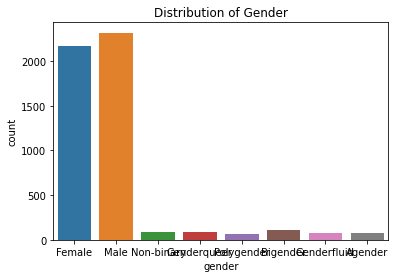

In [8]:
# See the distribution of gender to recognize different distributions
sns.countplot(data=df, x='gender')
plt.title('Distribution of Gender')

In [9]:
df.drop(df.loc[df['gender'] == 'Non-binary'].index, inplace=True)
df.drop(df.loc[df['gender'] == 'Agender'].index, inplace=True)
df.drop(df.loc[df['gender'] == 'Bigender'].index, inplace=True)
df.drop(df.loc[df['gender'] == 'Polygender'].index, inplace=True)
df.drop(df.loc[df['gender'] == 'Genderfluid'].index, inplace=True)
df.drop(df.loc[df['gender'] == 'Genderqueer'].index, inplace=True)
df.head()

,orderID,orderDate,clienteID,CEP,estado,bairro,cidade,rua,numero,endereco,gender,age,plataform,total,products,cupon,spendingScore
0,1,24/11/2022 19:03,b23d4264-b084-4b5f-b341-fb1775b0a2f9,81650130,PR,Boqueirão,Curitiba,Rua São Pedro,821,"Rua São Pedro, 821 - Boqueirão, Curitiba - PR,...",Female,23,app,134.56,9,None,0.149511
1,2,26/02/2022 11:57,eec8a486-7373-4d7d-a859-750455fd190c,80240150,PR,Água Verde,Curitiba,Travessa Lange,211,"Travessa Lange, 211 - Água Verde, Curitiba - P...",Female,35,android,1242.82,7,VERAOOFF15,1.775457
2,3,13/05/2022 10:40,33bde395-65fa-43aa-bb9b-90b8e9e4bbba,82220416,PR,Cachoeira,Curitiba,Rua Rolando Salin Zappa Mansur,549,"Rua Rolando Salin Zappa Mansur, 549 - Cachoeir...",Female,29,android,1118.59,6,FOX5POR3,1.864317
3,4,16/08/2022 12:17,9f95c07d-d9e3-45d4-835e-a0dbc87d22ac,82220360,PR,Cachoeira,Curitiba,Rua Maria Lenk,546,"Rua Maria Lenk, 546 - Cachoeira, Curitiba - PR...",Male,21,ios,1384.44,3,None,4.6148
4,5,07/10/2022 09:52,6095ef93-3172-4a95-838e-5fa7f2ddb108,80230972,PR,Rebouças,Curitiba,Rua João Negrão,353,"Rua João Negrão, 353 - Rebouças, Curitiba - PR...",Female,30,safari,357.6,10,None,0.3576


Text(0.5, 0, 'Age')

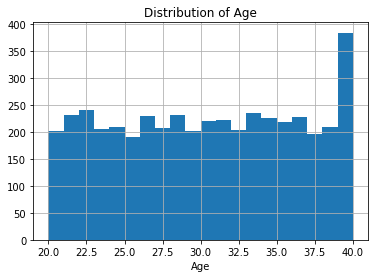

In [10]:
# Histogram of ages
df.hist('age', bins=20);
plt.title('Distribution of Age');
plt.xlabel('Age')

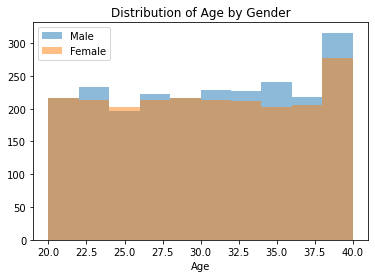

In [11]:
# Histogram of ages by gender
plt.hist('age', data=df[df['gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('age', data=df[df['gender'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.legend()

Text(0.5, 0, 'Total Spend by Order (R$ BRL)')

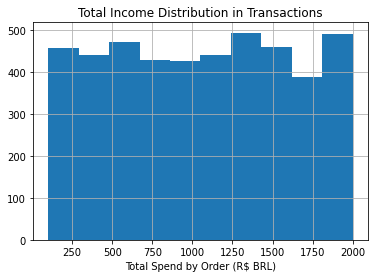

In [12]:
# Histogram of income
df.hist('total')
plt.title('Total Income Distribution in Transactions')
plt.xlabel('Total Spend by Order (R$ BRL)')

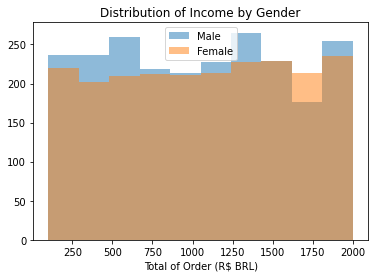

In [13]:
# Histogram of income by gender
plt.hist('total', data=df[df['gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('total', data=df[df['gender'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Income by Gender')
plt.xlabel('Total of Order (R$ BRL)')
plt.legend()

In [14]:
# Create data sets by gender
male_customers = df[df['gender'] == 'Male']
female_customers = df[df['gender'] == 'Female']

In [15]:
# Print the average spending score for men and women
print(male_customers['spendingScore'].mean())
print(female_customers['spendingScore'].mean())

2.4052603335765324
2.4242299478995464


c:\Users\junio\.venv\fulldata310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age to Income, Colored by Gender')

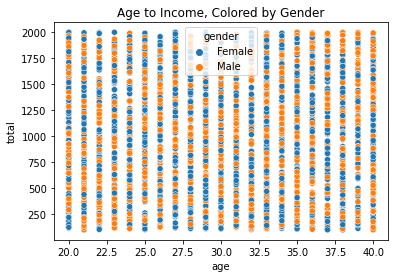

In [18]:
sns.scatterplot('age', 'total', hue='gender', data=df)
plt.title('Age to Income, Colored by Gender')